In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.offline as py
import itertools 
import warnings 
warnings.filterwarnings('ignore')
import os 
import io
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls 
import plotly.figure_factory as ff

%matplotlib inline 

In [38]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [40]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [41]:
data.shape

(10000, 14)

EDA

In [5]:
#view database information including shape, type and descript name. etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#count the number of unique values for each descriptor 
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
##remove irrelevant variables 
data=data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [8]:
##desribe all the statistical properties of the data 
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

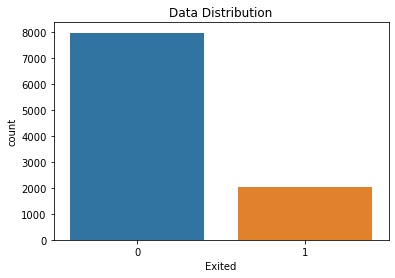

In [10]:
##analyze the suscribe and unsusucribe rate 
sns.countplot(data['Exited'])
plt.title('Data Distribution')
plt.show()
#there is data imbalance here 

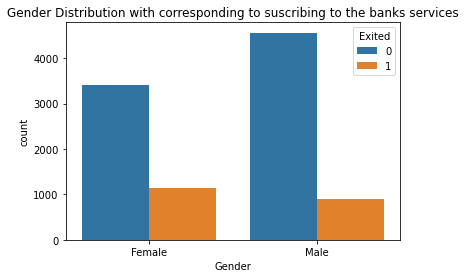

In [11]:
#looking at the gender distributiion with respect to suscribing to the banks terms 
plt.title('Gender Distribution with corresponding to suscribing to the banks services')
sns.countplot(data['Gender'], hue=data['Exited'])
plt.show()

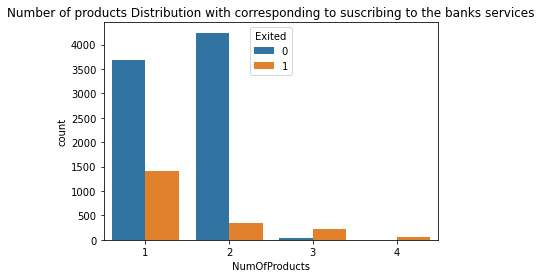

In [12]:
plt.title('Number of products Distribution with corresponding to suscribing to the banks services')
sns.countplot(data['NumOfProducts'], hue=data['Exited'])
plt.show()

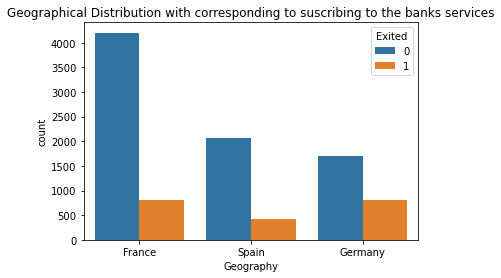

In [13]:
plt.title('Geographical Distribution with corresponding to suscribing to the banks services')
sns.countplot(data['Geography'], hue=data['Exited'])
plt.show()

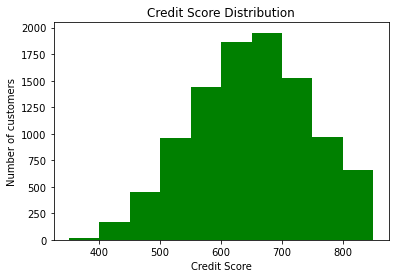

In [14]:
plt.title("Credit Score Distribution")
plt.hist(data['CreditScore'], color='green')
plt.xlabel('Credit Score')
plt.ylabel('Number of customers')
plt.show()

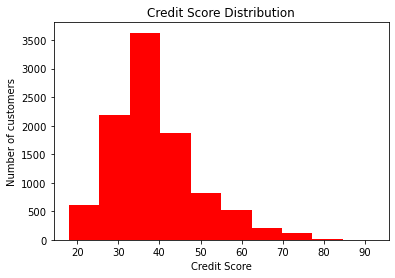

In [15]:
plt.title("Credit Score Distribution")
plt.hist(data['Age'], color='red')
plt.xlabel('Credit Score')
plt.ylabel('Number of customers')
plt.show()

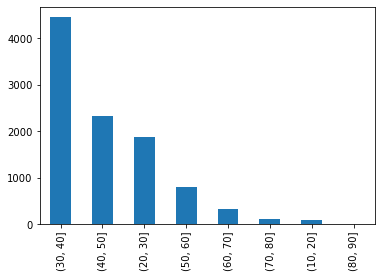

In [16]:
#categorizing customers age 
bins=[10,20,30,40,50,60,70,80,90]
age=pd.cut(data['Age'], bins=bins)
age.value_counts().plot.bar()

Exited,0,1
Age,,
"(10, 20]",84,5
"(20, 30]",1736,143
"(30, 40]",3913,538
"(40, 50]",1532,788
"(50, 60]",349,448
"(60, 70]",227,104
"(70, 80]",111,10
"(80, 90]",9,1


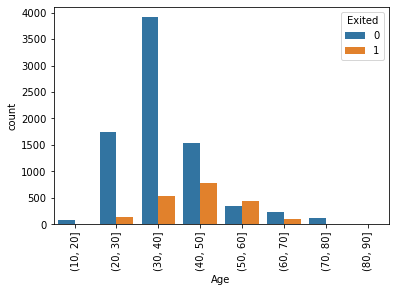

In [17]:
sns.countplot(age, hue=data['Exited'])
plt.xticks(rotation=90)
pd.crosstab(age, data['Exited'])

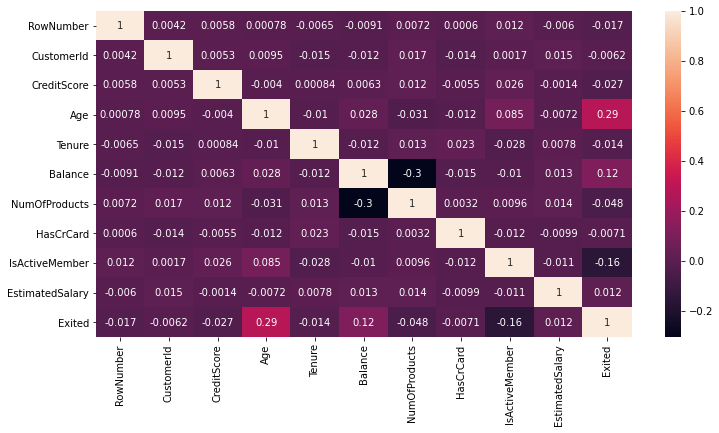

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)
plt.show()
##there is no significant relationship between the variables 

In [18]:
from sklearn.preprocessing import OneHotEncoder
data['Geography']=pd.get_dummies(data['Geography'])
data['Gender']=pd.get_dummies(data['Gender'])

MACHINE LEARNING 


In [19]:
X=data.iloc[:,0:10]
y=data.iloc[:,10]

In [20]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.metrics import roc_auc_score, classification_report

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print('X Test:',X_test.shape)
print('X Train:',X_train.shape)

X Test: (3000, 10)
X Train: (7000, 10)


In this section, we are implementing code that will give us an idea of how our trained models perform on the test data. We use Accuracy metrics and AUC-ROC score during this process.

Why ROC as metric?

(ROC) is frequently used to evaluate the performance of binary classification algorithms. It provides a graphical representation of a classifier's performance, rather than a single value like most other metrics.

One advantage of ROC curves is that they help us find a classification threshold that suits our specific problem. Moreover, ROC curves and AUC scores also allow us to compare the performance of different classifiers for the same problem.

In [22]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(classification_report(lr_pred,y_test))
lr_roc_score=roc_auc_score(lr_pred,y_test)
print(lr_roc_score)

              precision    recall  f1-score   support

           0       0.97      0.81      0.89      2890
           1       0.08      0.44      0.14       110

    accuracy                           0.80      3000
   macro avg       0.53      0.63      0.51      3000
weighted avg       0.94      0.80      0.86      3000

0.6254482541679773


In [23]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(classification_report(rf_pred,y_test))
rf_roc_score=roc_auc_score(rf_pred,y_test)
print(rf_roc_score)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2675
           1       0.42      0.76      0.55       325

    accuracy                           0.86      3000
   macro avg       0.70      0.82      0.73      3000
weighted avg       0.91      0.86      0.88      3000

0.8187347232207046


In [24]:
ada=AdaBoostClassifier(n_estimators=200, learning_rate=1.0)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
print(classification_report(ada_pred,y_test))
ada_roc_score=roc_auc_score(ada_pred,y_test)
print(ada_roc_score)

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      2613
           1       0.47      0.71      0.56       387

    accuracy                           0.86      3000
   macro avg       0.71      0.79      0.74      3000
weighted avg       0.89      0.86      0.87      3000

0.7932030366948798


In [25]:
xgb=xgboost.XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
xgb_roc_score=roc_auc_score(xgb_pred,y_test)
print(xgb_roc_score)

[14:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7927245650357779


In [26]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print(classification_report(gb_pred,y_test))
gb_roc_score=roc_auc_score(gb_pred,y_test)
print(gb_roc_score)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2659
           1       0.46      0.79      0.58       341

    accuracy                           0.87      3000
   macro avg       0.71      0.83      0.75      3000
weighted avg       0.91      0.87      0.88      3000

0.8335410419325061


In [27]:
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
kn_pred=kn.predict(X_test)
print(classification_report(kn_pred,y_test))
kn_roc_score=roc_auc_score(kn_pred,y_test)
print(kn_roc_score)

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      2788
           1       0.09      0.25      0.14       212

    accuracy                           0.77      3000
   macro avg       0.51      0.53      0.50      3000
weighted avg       0.88      0.77      0.82      3000

0.5323082753580033


In [28]:
models=['Logistic Regression', 'Random Forest','XGBoost', 'KNN','Ada Boost','Gradient Boosting']
roc=[lr_roc_score, rf_roc_score, xgb_roc_score, kn_roc_score, ada_roc_score, gb_roc_score]
pd.DataFrame(roc, index=models)

,0
Logistic Regression,0.625448
Random Forest,0.818735
XGBoost,0.792725
KNN,0.532308
Ada Boost,0.793203
Gradient Boosting,0.833541


In [29]:
features_label=X.columns
importances=rf.feature_importances_
indices=(np.argsort(importances)[::-1])
for i in range(X.shape[1]):
    print((i+1, 30, features_label[i], importances[indices[i]]))
indices

(1, 30, 'CreditScore', 0.242925561535361)
(2, 30, 'Geography', 0.15244491092976298)
(3, 30, 'Gender', 0.14674785475224142)
(4, 30, 'Age', 0.14321645005142733)
(5, 30, 'Tenure', 0.13062283746568668)
(6, 30, 'Balance', 0.08395575803162188)
(7, 30, 'NumOfProducts', 0.04110066068182536)
(8, 30, 'HasCrCard', 0.020274276492263526)
(9, 30, 'IsActiveMember', 0.01944989101386346)
(10, 30, 'EstimatedSalary', 0.01926179904594646)


array([3, 9, 0, 5, 6, 4, 8, 1, 2, 7], dtype=int64)

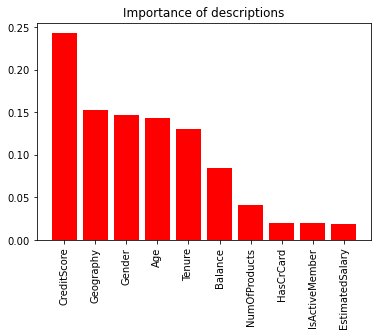

In [30]:
plt.title('Importance of descriptions')
plt.bar(range(X.shape[1]),importances[indices], color='red', align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.show()

MODEL OPTIMIZATION 
 Implementation of cross-validation

In [31]:
from sklearn.model_selection import cross_val_score

# Function which gives as output the roc_auc measurement plus the standard deviation (STD)
def cvDict(functions, X_train, y_train, cv, scr):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        print('\n', str(func).split('(')[0],':', cvScore)
        cvDict[str(func).split('(')[0]] = [round(cvScore.mean(),2), cvScore.std()]
        
    return cvDict

In [32]:
models = [ada, gb, xgb]
print(' Roc_auc score for a cv = 5')
cvD = cvDict(models, X_train, y_train, 5, scr ='roc_auc')
print('\n','='*100, '\n')
print('Average Score plus STD for each model')
cvD

 Roc_auc score for a cv = 5

 AdaBoostClassifier : [0.81383185 0.84762285 0.83830205 0.83758155 0.81742777]

 GradientBoostingClassifier : [0.84684664 0.86216957 0.86888439 0.85559957 0.84246816]
[14:03:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:03:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective '

{'AdaBoostClassifier': [0.83, 0.013052937557017374],
 'GradientBoostingClassifier': [0.86, 0.00967341895484155],
 'XGBClassifier': [0.83, 0.01005850788479607]}

As we can see, in the output above, GradietBoosting, Xgboost, and Adaboost are performing well. This cross-validation score helps us to decide which model we should select and which we should not go with. Based on the average value of ROC_AUC and the value of the standard deviation, we can conclude that the ROC_AUC score does not deviate much for most models (models do not suffer from the overfitting problem).

In this project, I worked on models that predict the likelihood that a customer will unsubscribe or not. During exploratory data analysis, I found that female customers are the most likely to unsubscribe, customers located in Germany are the most unsubscribed, and customers using only one product are the most unsubscribed. After using multiple models I ended up with three models (GradientBoosting, xgboost, and AdaBoost) that performed better than other Random Forestl and other ML models. I decided to go further with the three and set up a voting system for the three which will allow me to choose the best model. Since the issue is with binary classification with an imbalance database, I used the most efficient metric for model performance which is ROC-AUC score and my model hit about $87%$ "Accuracy".

In [33]:
import pickle
file=open('BankCustomerChurn.pkl','wb')
#dump the file 
pickle.dump(gb,file)
model=pickle.load(open('BankCustomerChurn.pkl','rb'))